In [1]:
library(GGPA)
vignette("GGPA-example")

Loading required package: GGally

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
data(simulation)
dim(simulation$pmat)
head(simulation$pmat)

[1] 20000     7

0.05201560,0.69394601,0.80095254,0.8935946,0.4062871,0.71502089,0.85759656
0.42270504,0.86932265,0.83619632,0.5979045,0.7480898,0.04931404,0.62476746
0.28201444,0.26960700,0.04520746,0.5359965,0.9764476,0.33313946,0.09141433
0.87792229,0.75501240,0.95592348,0.1425499,0.7948491,0.36315009,0.67920778
0.59408852,0.36952615,0.73312469,0.7972099,0.3852618,0.47646133,0.47012336
0.01012334,0.06122195,0.87669912,0.9065982,0.5867958,0.96146317,0.65355255


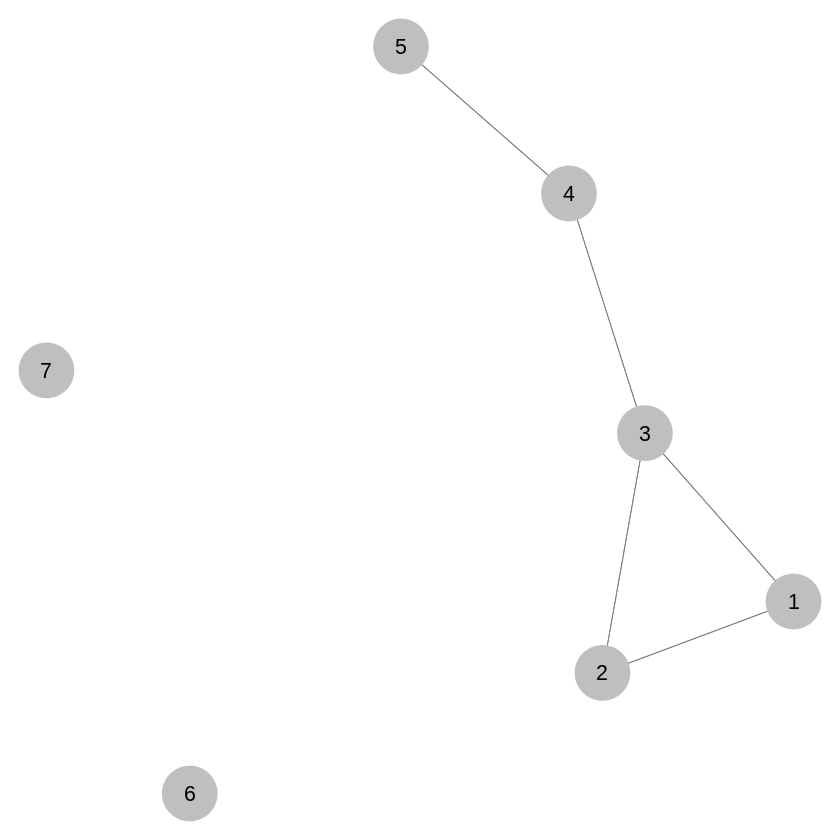

In [3]:
adjmat <- simulation$true_G
diag(adjmat) <- 0
ggnet2( adjmat, label=TRUE, size=15 )

Warning message in plot.window(...):
“"size" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"size" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"size" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"size" is not a graphical parameter”
Warning message in box(...):
“"size" is not a graphical parameter”
Warning message in title(...):
“"size" is not a graphical parameter”


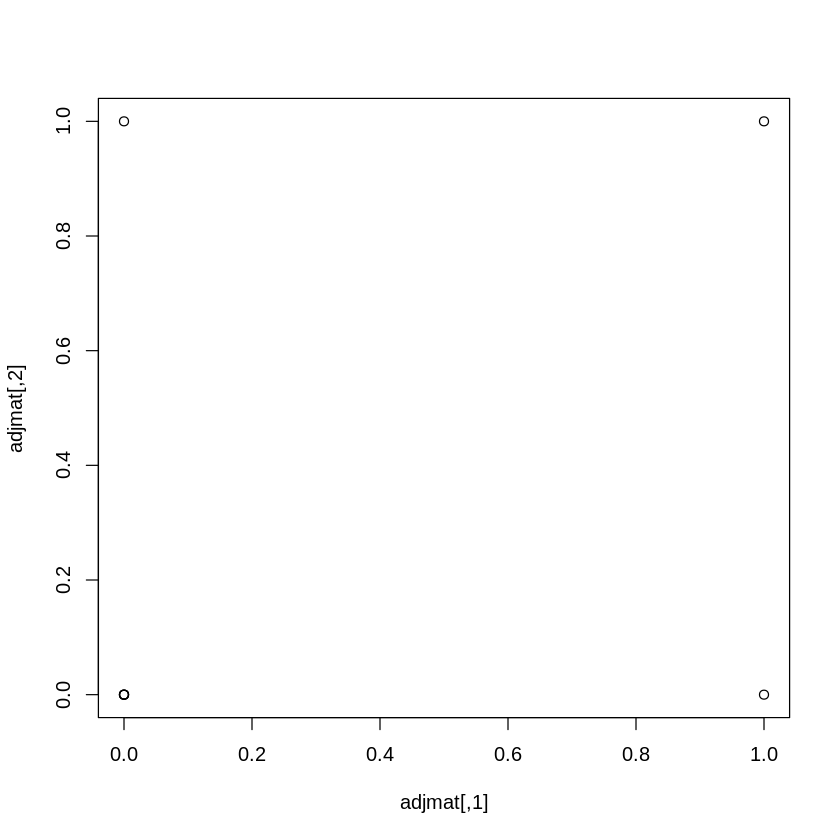

In [4]:
adjmat <- simulation$true_G
diag(adjmat) <- 0
plot( adjmat, size=15 )

In [5]:
set.seed(12345)
fit <- GGPA( simulation$pmat )

Info: Uniform prior will be used for the phenotype graph in the estimation.

Info: Number of GWAS data: 7

Info: Some SNPs have p-values close to zero.

Info: Number of SNPs with p-values close to zero: 234

Info: p-values for these SNPs are set to 1e-10



Burn in iterations...



Burn-in iteration: 100 / 10000

The last 100 iter= 0.1 min, Est. Time to go= 9.3 min

Burn-in iteration: 200 / 10000

The last 100 iter= 0.1 min, Est. Time to go= 8.1 min

Burn-in iteration: 300 / 10000

The last 100 iter= 0.1 min, Est. Time to go= 7.8 min

Burn-in iteration: 400 / 10000

The last 100 iter= 0.1 min, Est. Time to go= 7.8 min

Burn-in iteration: 500 / 10000

The last 100 iter= 0.1 min, Est. Time to go= 7.5 min

Burn-in iteration: 600 / 10000

The last 100 iter= 0.1 min, Est. Time to go= 7.5 min

Burn-in iteration: 700 / 10000

The last 100 iter= 0.1 min, Est. Time to go= 7.4 min

Burn-in iteration: 800 / 10000

The last 100 iter= 0.1 min, Est. Time to go= 7.4 min

Burn-in iteration: 900 / 1000

In [6]:
set.seed(12345)
fit <- GGPA( simulation$pmat, nBurnin=200, nMain=200 )

Info: Uniform prior will be used for the phenotype graph in the estimation.

Info: Number of GWAS data: 7

Info: Some SNPs have p-values close to zero.

Info: Number of SNPs with p-values close to zero: 234

Info: p-values for these SNPs are set to 1e-10



Burn in iterations...



Burn-in iteration: 100 / 200

The last 100 iter= 0.1 min, Est. Time to go= 0.1 min

Burn-in iteration: 200 / 200

The last 100 iter= 0.1 min, Est. Time to go= 0 min



Main MCMC iterations...



Burn-in iteration: 100 / 200

The last 100 iter= 0.1 min, Est. Time to go= 0.1 min

Burn-in iteration: 200 / 200

The last 100 iter= 0.1 min, Est. Time to go= 0 min



In [7]:
fit

Summary: GGPA model fitting results (class: GGPA)
--------------------------------------------------
Data summary:
	Number of GWAS data: 7
	Number of SNPs: 20000
Use a prior phenotype graph? NO
mu
     estimate   SE
[1,]     1.12 0.02
[2,]     0.99 0.01
[3,]     1.19 0.03
[4,]     1.19 0.01
[5,]     1.32 0.01
[6,]     1.11 0.02
[7,]     1.31 0.02
sigma
     estimate   SE
[1,]     0.38 0.01
[2,]     0.29 0.01
[3,]     0.34 0.02
[4,]     0.30 0.01
[5,]     0.38 0.01
[6,]     0.38 0.01
[7,]     0.27 0.01
Proportion of associated SNPs
     estimate SE
[1,]     0.04  0
[2,]     0.08  0
[3,]     0.02  0
[4,]     0.04  0
[5,]     0.06  0
[6,]     0.07  0
[7,]     0.03  0
--------------------------------------------------

In [ ]:
str(estimates(fit))

In [ ]:
assoc.marg <- assoc( fit, FDR=0.10, fdrControl="global" )
dim(assoc.marg)
apply( assoc.marg, 2, table )

In [8]:
fdr.marg <- fdr(fit)
dim(fdr.marg)
head(fdr.marg)

[1] 20000     7

0.970,1.00,1.000,1,1,1.000,1
1.000,1.00,1.000,1,1,0.895,1
1.000,1.00,0.995,1,1,1.000,1
1.000,1.00,1.000,1,1,1.000,1
1.000,1.00,1.000,1,1,1.000,1
0.645,0.69,1.000,1,1,1.000,1


In [9]:
assoc.joint <- assoc( fit, FDR=0.10, fdrControl="global", i=1, j=2 )
length(assoc.joint)
head(assoc.joint)
table(assoc.joint)

Info: Association mapping for specified i & j phenotype pair.

Info: Association mapping based on the global FDR control at level 0.1.



[1] 20000

[1] 0 0 0 0 0 0

assoc.joint
    0     1 
19411   589 

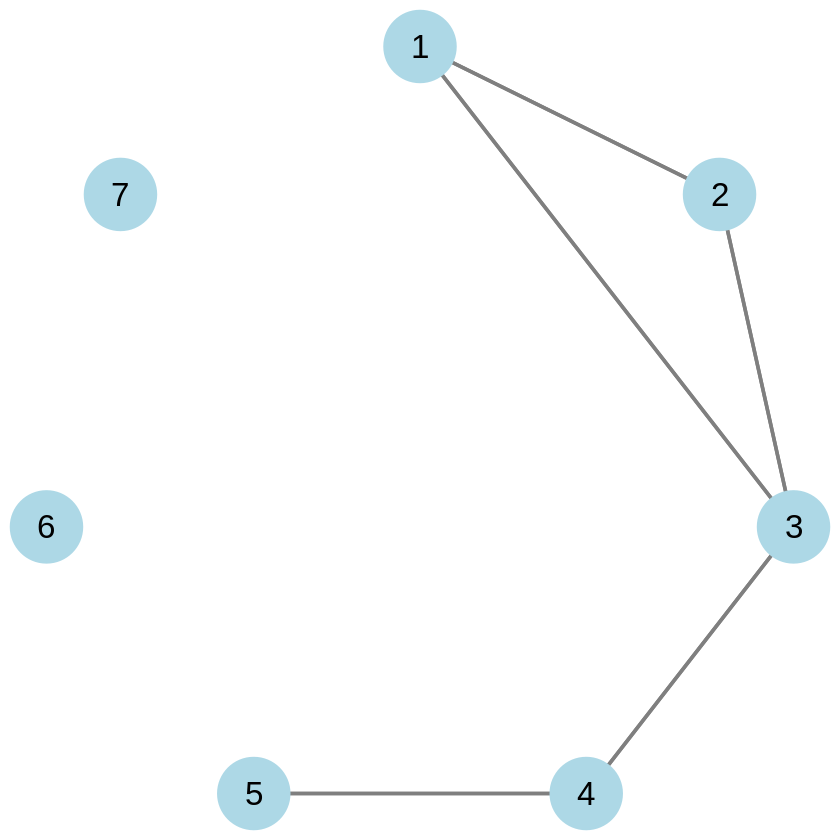

In [10]:
#In the joint analysis of multiple GWAS data, it is of interest to investigate the genetic relationship among the phenotypes. The graph-GPA framework allows users to check this using a phenotype graph. This phenotype graph can be generated by applying `\texttt{plot}' method to the output of `\texttt{GGPA}' method (`\texttt{fit}' in this example).

plot(fit)